#  Immagini a colori


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from skimage import data, io

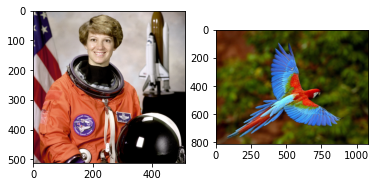

In [23]:
img1 = data.astronaut() # scikit-image comes already with some images (try to use the <TAB> key on data.)
img2 = io.imread('images/parrot_small.jpg') # or you can load a custom one (see the folder 'images')

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2);

### La struttura dati

In [24]:
print("image data type is: {}".format(type(img1)))
print("image shape is: {}".format(img1.shape))

image data type is: <class 'numpy.ndarray'>
image shape is: (512, 512, 3)


Un'immagine `RGB` è memorizzata in un array tridimensionale(shape = **rows** $\mathbf{\times}$ **columns** $\mathbf{\times}$ **channels**). Possiamo analizzarlo a livelli o layer: le intensità di ogni canale sono memorizzate in una matrice

 

In [26]:
R = img1[:,:,0]
G = img1[:,:,1]
B = img1[:,:,2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512, 512)
G shape is: (512, 512)
B shape is: (512, 512)


Nota: ogni singolo canale è un'immagine che codifica <i>intensità<i>: diamo un'occhiata ai primi elementi dell'immagine <span style="color:red">rossa</span> 

In [6]:
print(R[:3,:5])

[[154 109  63  54  76]
 [177 144 113 106 128]
 [201 182 168 159 167]]


Qual è il range di valori di ogni singolo canale dell'immagine?

In [7]:
 print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


Visualizziamo i tre canali: si tratta di tre immagini ad intensità, che misurano la quantità di rosso, di verde e di blu rispettivamente.

NB: Non fatevi ingannare dai falsi colori!!

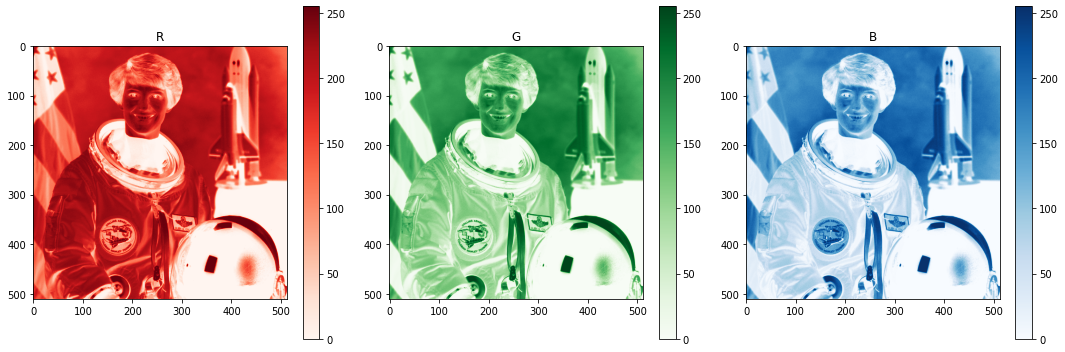

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow((R), cmap='Reds'); #cmap='Reds' <-- falsi colori
plt.colorbar(orientation='vertical')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow((G), cmap='Greens');
plt.title('G')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow((B), cmap='Blues');
plt.title('B')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

### <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> to grayscale conversion

Come possiamo trasformare un'immagine a colori in un'immagine a livelli di grigio? Esiste una formula che pesa le componenti in modo adeguato

$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

*I coefficienti rappresentano le intensità percepite dalla rappresentazione tricromatica umana: la sensibilità maggiore è sul verde, la minore sul blu* [cit. <a href="https://en.wikipedia.org/wiki/Grayscale">Wikipedia</a>]

La funzione qui di seguito implementa la conversione

In [28]:
def my_rgb2gray(img):
    return 0.2125 * (img[:,:,0]) + 0.7154 * (img[:,:,1]) + 0.0721 * (img[:,:,2])

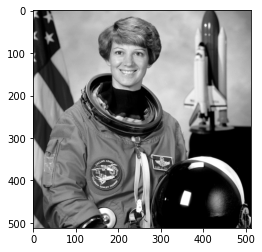

In [29]:
##Code here
plt.imshow(my_rgb2gray(img1), cmap='gray'); # nota la mappa di colori scelta qui

Nella libreria `skimage` esiste una funzione già pronta **<a href="http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray">color.rgb2gray</a>**.

## Segmentazione di colore 

Il modo più semplice per effettuare segmentazione di colore è tramite sogliatura. Partiamo separando i 3 canali


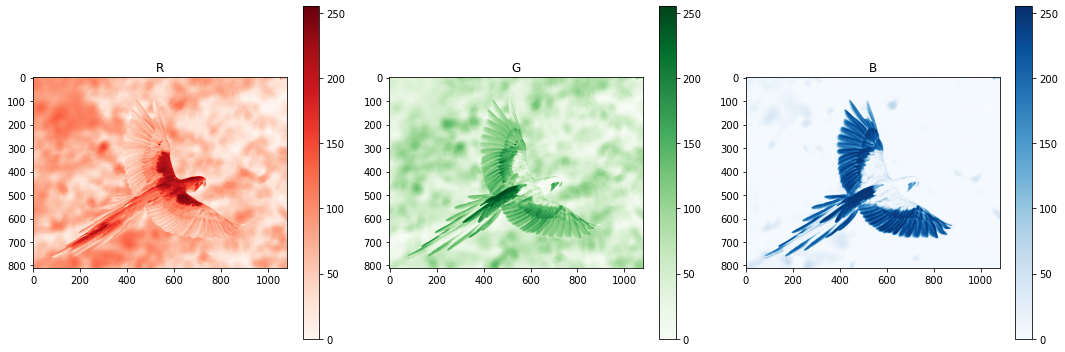

In [31]:
R = img2[:,:,0]
G = img2[:,:,1]
B = img2[:,:,2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow((R), cmap='Reds'); #cmap='Reds' <-- falsi colori
plt.colorbar(orientation='vertical')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow((G), cmap='Greens');
plt.title('G')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow((B), cmap='Blues');
plt.title('B')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

Notate l'uso dell'operatore relazionale

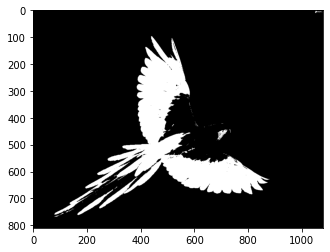

In [71]:
mask = (B > 100)
plt.imshow(mask, cmap='gray');

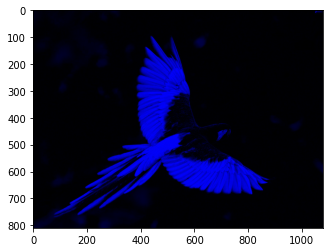

In [49]:
mask3=np.copy(img2)
mask3[:,:,0]=mask
mask3[:,:,1]=mask
plt.imshow(mask3, cmap='gray');

## Spazio HSV

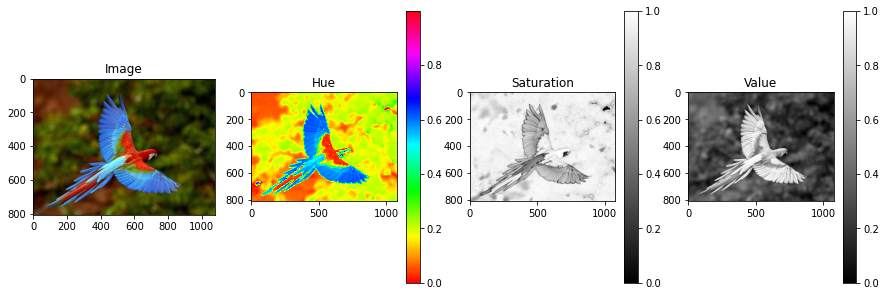

In [65]:
from skimage.color import rgb2hsv
hsv_img = rgb2hsv(img2)
H = hsv_img[:, :, 0]
S = hsv_img[:, :, 1]
V = hsv_img[:, :, 2]

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(img2);  
#plt.colorbar(orientation='vertical')
plt.title('Image')

plt.subplot(1,4,2)
plt.imshow((H), cmap='hsv');  
plt.colorbar(orientation='vertical')
plt.title('Hue')

plt.subplot(1,4,3)
plt.imshow(S,cmap='gray');
plt.title('Saturation')
plt.colorbar(orientation='vertical')

plt.subplot(1,4,4)
plt.imshow(V, cmap='gray');
plt.title('Value')
plt.colorbar(orientation='vertical')

fig.tight_layout()

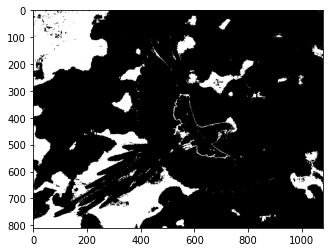

In [76]:
mask_brown1 = (H<0.12)
mask_brown2 = (H>0.05)
mask_brown = mask_brown1&mask_brown2

plt.imshow(mask_brown, cmap='gray');